In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
alldata, label_true = load_data('gaussian2d') # iris
pca_painter = PaintPCA(alldata)

No PCA performed


Category 5 is too small
Category 5 is too small


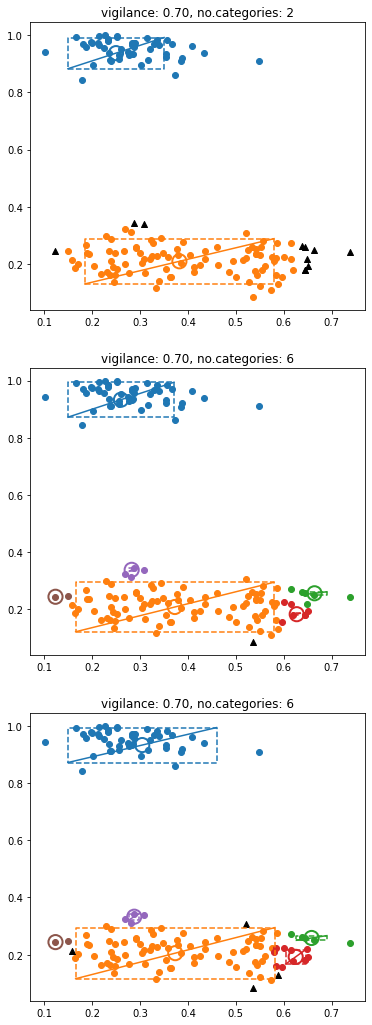

In [3]:
np.random.shuffle(alldata)

no_epoch = 3
fig, axs = plt.subplots(no_epoch, 1,
                        figsize = (6, 6 * no_epoch))
#fig.tight_layout()

# plot true data
#pca_painter.scatter(axs[0], label_true)
#axs[0].set_title("true data")

# init
rho=0.7
net = FuzzyART(alpha=0.5, gamma=.1, rho=rho)

for ax, data in zip(axs, alldata.reshape(no_epoch, -1, 2)):    
    
    # train
    net.train(data) # each epoch, all data is shuffled
    label_predall = net.test(alldata)
    label_pred = label_predall[:, 0].astype(int)

    # plot
    # pred
    pca_painter.scatter(ax, label_pred, alldata)
    
    # bipole and centre
    pca_painter.tripole(ax, *net.getcat_bipole())
    
    # boundary    
    ax.set_prop_cycle(None)
    pca_painter.boundary(ax, net.getcat_vertex())
    
    # info
    cat_number = net.w.shape[0]
    ax.set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
   
# save fig
simname = 'var_rho{:d}'.format(int(rho*100))
dirname = '_simcache'
#savefigure_datetime(fig, simname, dirname)



In [6]:
b = []
x = np.linspace(0,1,101)
for t in x:
    b.append(net._score_category(net._complement_code(np.array([0.55, t])), None, None)[0])

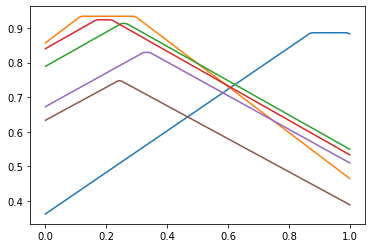

In [7]:
plt.plot(x,b)

In [8]:
net.w

array([[0.14971982, 0.8720839 , 0.54022004, 0.00569771],
       [0.16586255, 0.11581096, 0.41860534, 0.70539525],
       [0.62628533, 0.25014905, 0.3103013 , 0.73351386],
       [0.60409605, 0.16730765, 0.35441915, 0.78262822],
       [0.2777459 , 0.32257727, 0.70153498, 0.65710168],
       [0.12380977, 0.24386571, 0.87619023, 0.75613429]])

In [9]:
net2 = FuzzyART(alpha=0.5, gamma=.1, rho=rho)

In [13]:
net2.w = np.copy(net._scale_weight(.2))

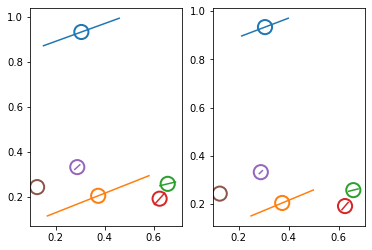

In [14]:
fig, ax = plt.subplots(1,2)
pca_painter.tripole(ax[0], *net.getcat_bipole())
pca_painter.tripole(ax[1], *net2.getcat_bipole())